In [ ]:
#initial library imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
#mounting google drive to help with the heavy files used.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import data from drive and also use date parser for converting date column  to dates format.
dateparse = lambda dates: [pd.datetime.strptime(d, '%m/%d/%Y %I:%M:%S %p') for d in dates]
df = pd.read_csv('/content/gdrive/My Drive/Crime_Data_from_2010_to_2019-re.csv',date_parser=dateparse, parse_dates=[2],squeeze=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
#check if parser has converted date column to datetime.
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.dtypes

DR_NO                      int64
Date Rptd                 object
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

In [ ]:
#observe shape of data to understanding the key columns need for our analysis.
df.shape

(2115664, 28)

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,2010-09-12,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,2010-08-09,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,2010-01-05,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,2010-01-02,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [ ]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
2115659,190608903,03/28/2019 12:00:00 AM,2019-03-28,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2115660,190715222,08/15/2019 12:00:00 AM,2019-08-14,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),...,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
2115661,192004409,01/06/2019 12:00:00 AM,2019-01-06,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2115662,191716777,10/17/2019 12:00:00 AM,2019-10-16,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085
2115663,190805435,02/01/2019 12:00:00 AM,2019-02-01,1615,8,West LA,852,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,1700 BARRY AV,NaN,34.0420,-118.4531


In [ ]:
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Day'] = df['DATE OCC'].dt.day
df["month_names"] = df["DATE OCC"].dt.month_name()
df['day_of_week'] = df['DATE OCC'].dt.day_name()
from datetime import datetime as dt
df['month-year'] = df['DATE OCC'].dt.strftime('%Y-%m')

In [ ]:
# Create a year month date by setting every item within a month to be on the first day 
from datetime import date
df['Year-Month'] = df['DATE OCC'].apply(lambda x: date(x.year, x.month, 1))

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,Year,Month,Day,month_names,day_of_week,month-year,Year-Month
0,1307355,02/20/2010 12:00:00 AM,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,NaN,33.9825,-118.2695,2010,2,20,February,Saturday,2010-02,2010-02-01
1,11401303,09/13/2010 12:00:00 AM,2010-09-12,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,MANCHESTER AV,33.9599,-118.3962,2010,9,12,September,Sunday,2010-09,2010-09-01
2,70309629,08/09/2010 12:00:00 AM,2010-08-09,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,NaN,34.0224,-118.2524,2010,8,9,August,Monday,2010-08,2010-08-01
3,90631215,01/05/2010 12:00:00 AM,2010-01-05,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,HOLLYWOOD BL,34.1016,-118.3295,2010,1,5,January,Tuesday,2010-01,2010-01-01
4,100100501,01/03/2010 12:00:00 AM,2010-01-02,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,SAN PEDRO ST,34.0387,-118.2488,2010,1,2,January,Saturday,2010-01,2010-01-01


In [ ]:
#analyse dates into seasons using for loop to iterating through the month column.
def get_season(date):
        if 1<= date <= 3:
          return 'Winter'
        if 4<= date <= 6:
          return 'Spring'
        if 7<= date <= 9:
          return 'Summer'
        if 10<= date <= 12:
          return 'Autumn'

In [ ]:
#create season column and apply for loop.
df['Season'] = df.Month.apply(get_season)

In [ ]:
#check if new columns have been executed.
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LAT,LON,Year,Month,Day,month_names,day_of_week,month-year,Year-Month,Season
0,1307355,02/20/2010 12:00:00 AM,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,33.9825,-118.2695,2010,2,20,February,Saturday,2010-02,2010-02-01,Winter
1,11401303,09/13/2010 12:00:00 AM,2010-09-12,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,33.9599,-118.3962,2010,9,12,September,Sunday,2010-09,2010-09-01,Summer
2,70309629,08/09/2010 12:00:00 AM,2010-08-09,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,34.0224,-118.2524,2010,8,9,August,Monday,2010-08,2010-08-01,Summer
3,90631215,01/05/2010 12:00:00 AM,2010-01-05,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,34.1016,-118.3295,2010,1,5,January,Tuesday,2010-01,2010-01-01,Winter
4,100100501,01/03/2010 12:00:00 AM,2010-01-02,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,34.0387,-118.2488,2010,1,2,January,Saturday,2010-01,2010-01-01,Winter


In [ ]:
#count of weapons used
yax=df['Weapon Desc'].value_counts().head(10)
yax

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    430817
VERBAL THREAT                                      58662
UNKNOWN WEAPON/OTHER WEAPON                        57441
HAND GUN                                           34114
SEMI-AUTOMATIC PISTOL                              12905
KNIFE WITH BLADE 6INCHES OR LESS                   12844
OTHER KNIFE                                         9785
UNKNOWN FIREARM                                     7902
VEHICLE                                             7237
REVOLVER                                            5565
Name: Weapon Desc, dtype: int64

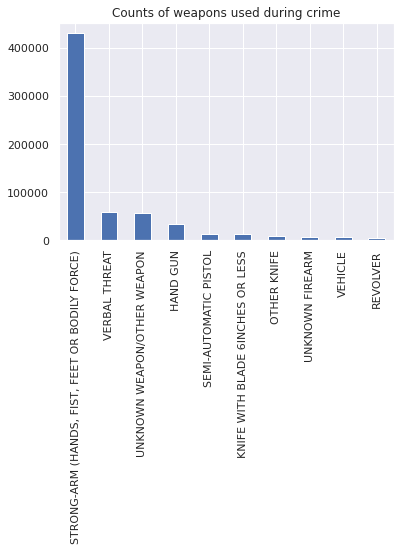

In [ ]:
#graphical representation of weapons used
yax.plot.bar(title='Counts of weapons used during crime')

Text(0.5, 1.0, 'Ethnicity count of victims')

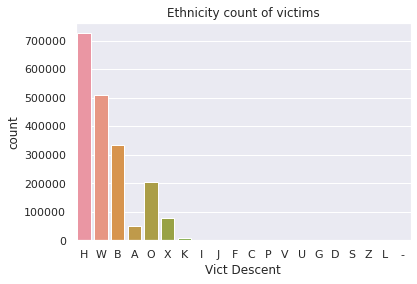

In [ ]:
#graphical representation of victim descent(using seaborn)
yx=sns.countplot(data=df,x='Vict Descent')
plt.title('Ethnicity count of victims')

In [ ]:
#Crime affecting hispanics only.
hispaniconly = df.loc[df['Vict Descent']=='H',['DATE OCC','AREA NAME','Year','Month', 'Day', 'Season', 'day_of_week','month_names','Year-Month','Crm Cd Desc','Weapon Desc']]
hispaniconly.head()

,DATE OCC,AREA NAME,Year,Month,Day,Season,day_of_week,month_names,Year-Month,Crm Cd Desc,Weapon Desc
0,2010-02-20,Newton,2010,2,20,Winter,Saturday,February,2010-02-01,VIOLATION OF COURT ORDER,NaN
2,2010-08-09,Newton,2010,8,9,Summer,Monday,August,2010-08-01,OTHER MISCELLANEOUS CRIME,NaN
4,2010-01-02,Central,2010,1,2,Winter,Saturday,January,2010-01-01,"RAPE, ATTEMPTED","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
6,2010-01-07,Central,2010,1,7,Winter,Thursday,January,2010-01-01,BURGLARY FROM VEHICLE,NaN
8,2010-01-09,Central,2010,1,9,Winter,Saturday,January,2010-01-01,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"


In [ ]:
#Top 10 Crime type affecting hispanics only
crimetype_hispanic = hispaniconly['Crm Cd Desc'].value_counts().head(10)
crimetype_hispanic

BATTERY - SIMPLE ASSAULT                                   85869
INTIMATE PARTNER - SIMPLE ASSAULT                          59153
BURGLARY FROM VEHICLE                                      57272
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             45157
THEFT PLAIN - PETTY ($950 & UNDER)                         44163
ROBBERY                                                    42900
THEFT OF IDENTITY                                          40553
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    39603
BURGLARY                                                   36929
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                   34168
Name: Crm Cd Desc, dtype: int64

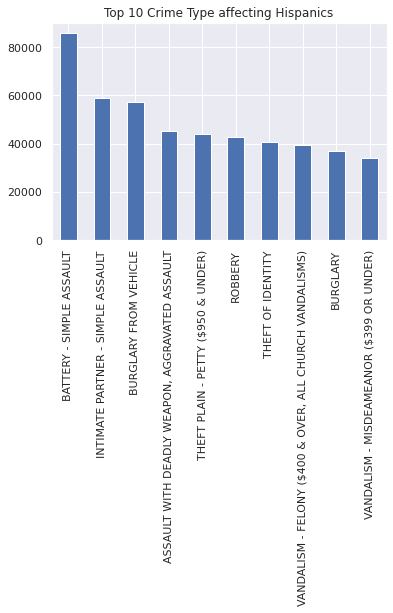

In [ ]:
#Barplot of Top 10 Crime type affecting hispanics only
crimetype_hispanic.plot.bar(title='Top 10 Crime Type affecting Hispanics')

In [ ]:
#Top 10 Weapon type used in committing Crime against hispanics only
weapontype_hispanic = hispaniconly['Weapon Desc'].value_counts().head(10)
weapontype_hispanic

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    209156
VERBAL THREAT                                      25814
UNKNOWN WEAPON/OTHER WEAPON                        21507
HAND GUN                                           16376
KNIFE WITH BLADE 6INCHES OR LESS                    6817
SEMI-AUTOMATIC PISTOL                               6372
OTHER KNIFE                                         5025
UNKNOWN FIREARM                                     3564
VEHICLE                                             3255
BOTTLE                                              2793
Name: Weapon Desc, dtype: int64

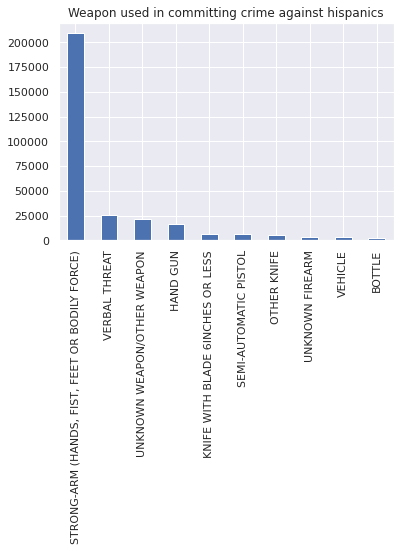

In [ ]:
weapontype_hispanic.plot.bar(title='Weapon used in committing crime against hispanics')

In [ ]:
#count of victims sex
df['Vict Sex'].value_counts()

M    974634
F    889084
X     55173
H        73
N        17
-         1
Name: Vict Sex, dtype: int64

Text(0.5, 1.0, 'Count of victims sex')

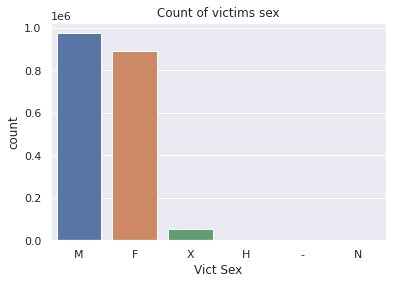

In [ ]:
#graphical representation of count of victims sex
sns.countplot(data=df,x='Vict Sex')
plt.title('Count of victims sex')

In [ ]:
#Shows age of victims,gives idea of age gap that are more vulnerable to be victims of crime
vict_age = df['Vict Age'].value_counts().head(10)
vict_age

0     369943
25     48117
26     47488
27     47026
24     46758
28     46465
29     45906
23     45209
30     45125
31     43070
Name: Vict Age, dtype: int64

Text(0.5, 1.0, 'Age of Victims')

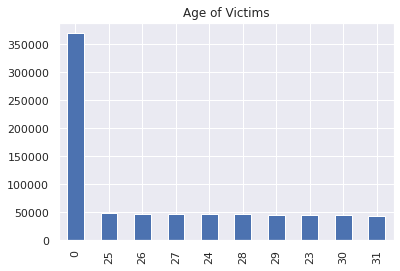

In [ ]:
#graphically show age of victims
vict_age.plot.bar()
plt.title('Age of Victims')

In [ ]:
#Count seasons and graph them.
Count_season = df['Season'].value_counts()
Count_season

Summer    541207
Spring    530324
Autumn    527228
Winter    516905
Name: Season, dtype: int64

In [ ]:
#use groupby and panda to group by season and covert the count to a dataframe.
occurenceByseason = pd.DataFrame(df.groupby('Season')['Season'].count().reset_index(name='Count')).set_index('Season')
occurenceByseason

,Count
Season,
Autumn,527228
Spring,530324
Summer,541207
Winter,516905


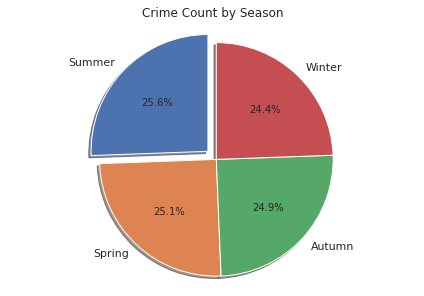

In [ ]:
# Pie chart
labels = ['Summer', 'Spring', 'Autumn', 'Winter']
sizes = [541207, 530324, 527228, 516905]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Crime Count by Season')
plt.show()

Text(0.5, 1.0, 'Crime count by season')

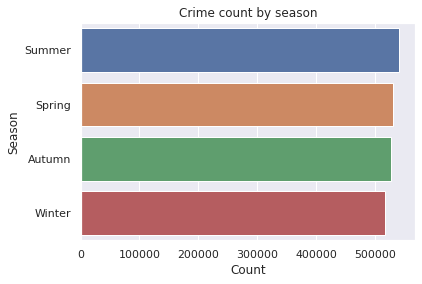

In [ ]:
#graph of crime count by season(using seaborn)
y=sns.barplot(data=occurenceByseason,y=occurenceByseason.index,x='Count',order=['Summer','Spring','Autumn','Winter'])
plt.title('Crime count by season')

Text(0.5, 1.0, 'Crime count by season')

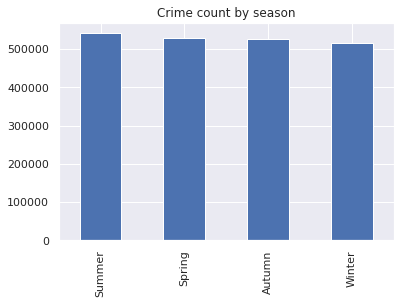

In [ ]:
#graph of crime count by season(using matplotlib)
Count_season.plot.bar()
plt.title('Crime count by season')

In [ ]:
#count crime type and graph top 10
Count_crime_Type = df[['Crm Cd Desc']].value_counts()
Count_crime_Type.head(10)

Crm Cd Desc                                            
BATTERY - SIMPLE ASSAULT                                   190551
BURGLARY FROM VEHICLE                                      162168
VEHICLE - STOLEN                                           159858
THEFT PLAIN - PETTY ($950 & UNDER)                         149831
BURGLARY                                                   147668
THEFT OF IDENTITY                                          127341
INTIMATE PARTNER - SIMPLE ASSAULT                          114550
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    109444
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              92702
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    90428
dtype: int64

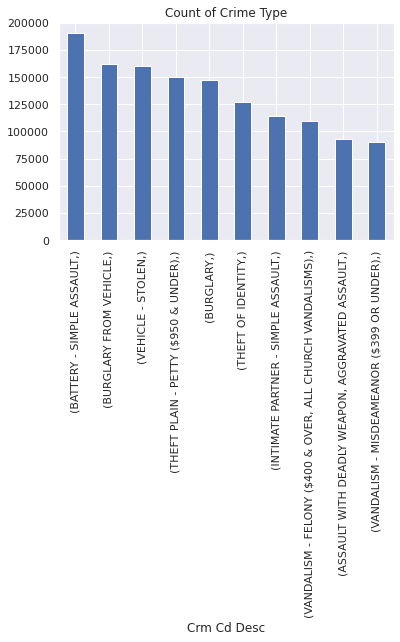

In [ ]:
Count_crime_Type.head(10).plot.bar(title='Count of Crime Type')

In [ ]:
#Battery is the highest crime type so we would sort only battery crime type and analyse further.
Battery_only = df.loc[df['Crm Cd Desc']=='BATTERY - SIMPLE ASSAULT',['DATE OCC','AREA NAME','Year','Month', 'Day', 'Season', 'day_of_week','month_names','Year-Month']]

In [ ]:
Battery_only.head(10)

,DATE OCC,AREA NAME,Year,Month,Day,Season,day_of_week,month_names,Year-Month
10,2010-01-14,Central,2010,1,14,Winter,Thursday,January,2010-01-01
23,2010-01-31,Central,2010,1,31,Winter,Sunday,January,2010-01-01
26,2010-01-31,Central,2010,1,31,Winter,Sunday,January,2010-01-01
30,2010-02-05,Central,2010,2,5,Winter,Friday,February,2010-02-01
31,2010-02-06,Central,2010,2,6,Winter,Saturday,February,2010-02-01
32,2010-02-05,Central,2010,2,5,Winter,Friday,February,2010-02-01
38,2010-02-13,Central,2010,2,13,Winter,Saturday,February,2010-02-01
44,2010-02-19,Central,2010,2,19,Winter,Friday,February,2010-02-01
45,2010-02-19,Central,2010,2,19,Winter,Friday,February,2010-02-01
52,2010-02-28,Central,2010,2,28,Winter,Sunday,February,2010-02-01


In [ ]:
Battery_onlyByday_of_week = pd.DataFrame(Battery_only.groupby('day_of_week')['day_of_week'].count().reset_index(name='Count')).set_index('day_of_week')
Battery_onlyByday_of_week

,Count
day_of_week,
Friday,27605
Monday,26053
Saturday,29136
Sunday,30387
Thursday,25655
Tuesday,25602
Wednesday,26113


Text(0.5, 1.0, 'Battery Crime Count by days of the Week')

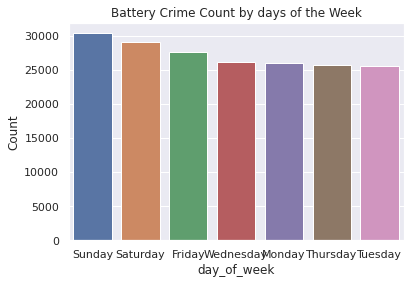

In [ ]:
#graph of battery occurence count by day of week(using seaborn)
sns.barplot(data=Battery_onlyByday_of_week,x=Battery_onlyByday_of_week.index,y='Count',order=['Sunday','Saturday','Friday','Wednesday','Monday','Thursday','Tuesday'])
plt.title('Battery Crime Count by days of the Week')

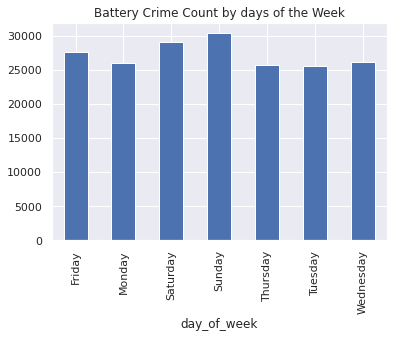

In [ ]:
#the days of the week where we have the highest number of battery cases. This is gotten by using a groupby and count function().
Battery_only.groupby(['day_of_week'])['AREA NAME'].count().plot.bar(title='Battery Crime Count by days of the Week')

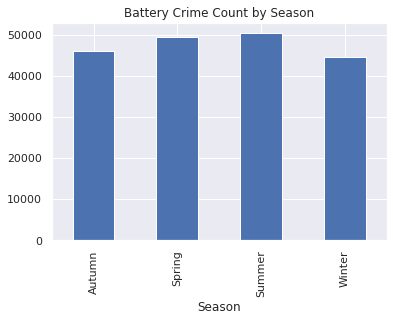

In [ ]:
#graph the season with the highest battery cases.
Battery_only.groupby(['Season'])['AREA NAME'].count().plot.bar(title= 'Battery Crime Count by Season')

In [ ]:
#Battery_only.groupby(['month_names'])['AREA NAME'].count().plot.bar()

Text(0.5, 1.0, 'Battery Crime Count by Months')

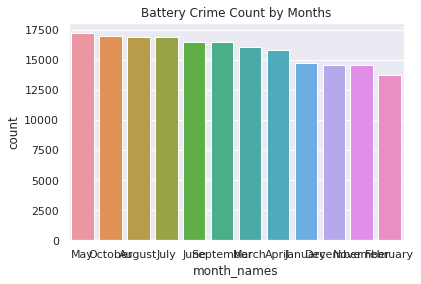

In [ ]:
#graph:Month with the highest crime count for Battery crime.(using seaborn)
sns.countplot(data=Battery_only,x='month_names',order=['May','October','August','July','June','September','March','April','January','December','November','February'])
plt.title('Battery Crime Count by Months')

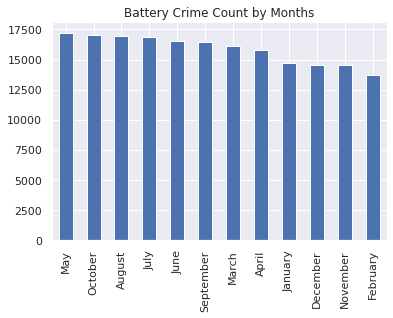

In [ ]:
#graph:Month with the highest crime count for Battery crime.(using matplotlib)
Battery_only['month_names'].value_counts().plot.bar(title='Battery Crime Count by Months')

In [ ]:
#convert date occ to day of the week in alphabets so we can identify the day of the week with the highest crime count.
df['day_of_week'] = df['DATE OCC'].dt.day_name()

In [ ]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Year', 'Month', 'Day', 'month_names', 'day_of_week',
       'month-year', 'Year-Month', 'Season'],
      dtype='object')

In [ ]:
#count and graph day of the week with highest crime count
Count_day_of_week = df['day_of_week'].value_counts()
Count_day_of_week

Friday       325272
Saturday     304248
Monday       301917
Wednesday    299117
Thursday     297809
Tuesday      296104
Sunday       291197
Name: day_of_week, dtype: int64

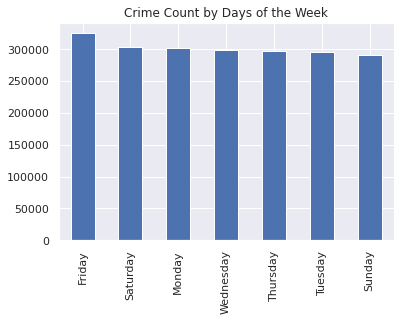

In [ ]:
Count_day_of_week.plot.bar(title='Crime Count by Days of the Week')

In [ ]:
#identify year with the highest crime count and graph it.
Count_crime_yr = df['Year'].value_counts()
Count_crime_yr

2017    230804
2018    228498
2016    225230
2019    216771
2015    215330
2010    209100
2012    201415
2011    200639
2014    195373
2013    192504
Name: Year, dtype: int64

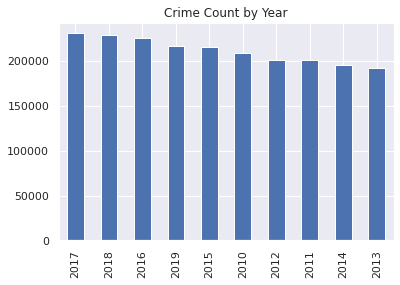

In [ ]:
Count_crime_yr.plot.bar(title='Crime Count by Year')

In [ ]:
#identify areas with the highest crime count and plot a graph.
crime_area_name_count = df['AREA NAME'].value_counts()
crime_area_name_count

77th Street    145295
Southwest      135450
N Hollywood    113928
Pacific        112540
Southeast      111474
Mission        103583
Northeast      100262
Newton         100007
Van Nuys        99730
Hollywood       99010
Central         98296
Topanga         97607
Devonshire      96500
Olympic         95325
Harbor          92015
Rampart         89594
West Valley     89578
West LA         89065
Wilshire        88607
Foothill        79872
Hollenbeck      77926
Name: AREA NAME, dtype: int64

Text(0.5, 1.0, 'Crime Count by Area Name')

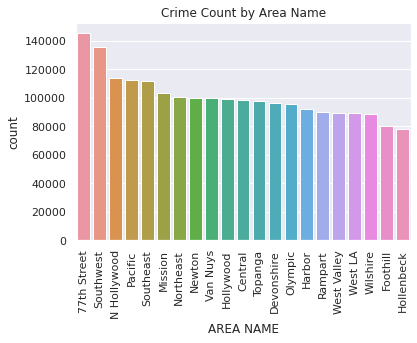

In [ ]:
#graphically represent areas with the highest crime count(using seaborn)
ac = sns.countplot(data=df,x='AREA NAME',order=['77th Street','Southwest','N Hollywood','Pacific','Southeast','Mission','Northeast','Newton','Van Nuys','Hollywood','Central','Topanga','Devonshire','Olympic','Harbor','Rampart','West Valley','West LA','Wilshire','Foothill','Hollenbeck'])
plt.setp(ac.get_xticklabels(), rotation=90)
plt.title('Crime Count by Area Name')

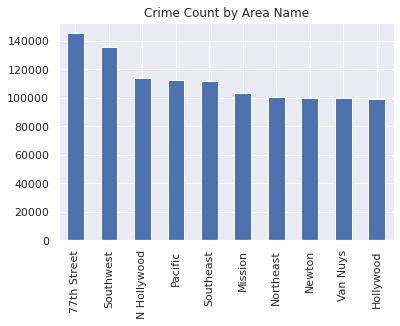

In [ ]:
#graphically represent areas with the highest crime count(using matplotlib),but only picking the top10.
crime_area_name_count.head(10).plot.bar(title='Crime Count by Area Name')

In [ ]:
#further analyse area with highest crime count by sorting using loc.
seventy7THstreetonly = df.loc[df['AREA NAME']=='77th Street',['DATE OCC','AREA NAME','Year','Month', 'Day', 'Season', 'day_of_week','month_names','Crm Cd Desc']]

In [ ]:
seventy7THstreetonly.head(5)

,DATE OCC,AREA NAME,Year,Month,Day,Season,day_of_week,month_names,Crm Cd Desc
9737,2010-03-27,77th Street,2010,3,27,Winter,Saturday,March,THEFT OF IDENTITY
19772,2010-04-26,77th Street,2010,4,26,Spring,Monday,April,VEHICLE - STOLEN
24263,2010-08-29,77th Street,2010,8,29,Summer,Sunday,August,ROBBERY
25725,2010-10-10,77th Street,2010,10,10,Autumn,Sunday,October,THEFT OF IDENTITY
35009,2010-02-15,77th Street,2010,2,15,Winter,Monday,February,VEHICLE - STOLEN


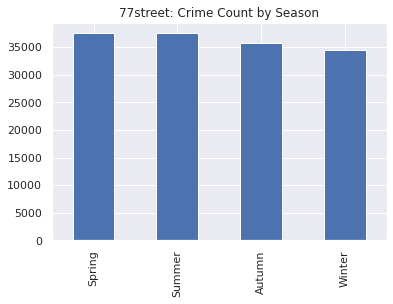

In [ ]:
#Count season with highest crime count in 77street and plot graph.
seventy7THstreetonly['Season'].value_counts().plot.bar(title='77street: Crime Count by Season')

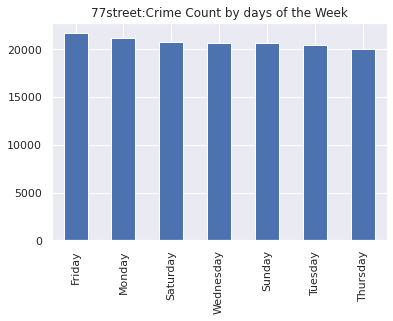

In [ ]:
seventy7THstreetonly['day_of_week'].value_counts().plot.bar(title='77street:Crime Count by days of the Week')

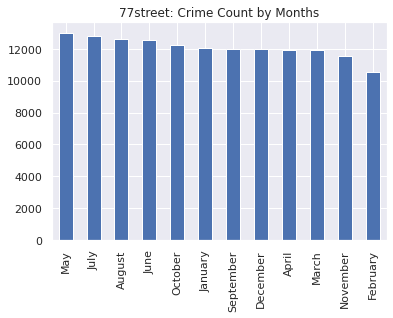

In [ ]:
#identify month with highest crime count in 77street and plot graph.
seventy7THstreetonly['month_names'].value_counts().plot.bar(title='77street: Crime Count by Months')

In [ ]:
#also identify the highest crime type in 77street and graph it.
seventy7THstreetonly[['Crm Cd Desc']].value_counts().head(10)

Crm Cd Desc                                            
BATTERY - SIMPLE ASSAULT                                   15050
VEHICLE - STOLEN                                           12986
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             11798
ROBBERY                                                    10249
INTIMATE PARTNER - SIMPLE ASSAULT                           9842
BURGLARY                                                    9598
BURGLARY FROM VEHICLE                                       7581
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    6917
THEFT PLAIN - PETTY ($950 & UNDER)                          6815
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6717
dtype: int64

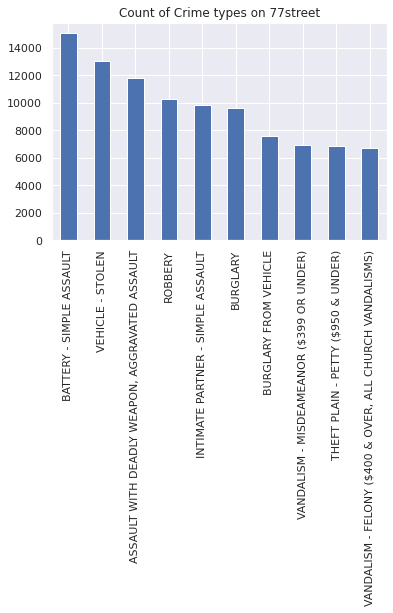

In [ ]:
seventy7THstreetonly['Crm Cd Desc'].value_counts().head(10).plot.bar(title='Count of Crime types on 77street')

In [ ]:
#ARIMA

In [ ]:
#use groupby to get a count of all battery crime count per month  and create a dataframe off it for usage in our timeseries analysis.
Battery = pd.DataFrame(Battery_only.groupby('Year-Month')['Year-Month'].count().reset_index(name='Count'))

In [ ]:
#check data types,as the year-month column type should be in datetime. Else we have to convert it using date time function in pandas.
#We can notice its an object, therefore we would convert it.
Battery.dtypes

Year-Month    object
Count          int64
dtype: object

In [ ]:
Battery.head()

,Year-Month,Count
0,2010-01-01,1689
1,2010-02-01,1487
2,2010-03-01,1751
3,2010-04-01,1713
4,2010-05-01,1868


In [ ]:
#Convert year-monht column to datetime to enable timeseries analysis take place.
Battery['Year-Month'] = pd.to_datetime(Battery['Year-Month'], yearfirst=True)

In [ ]:
#check if conversion has been effected.
Battery.dtypes

Year-Month    datetime64[ns]
Count                  int64
dtype: object

In [ ]:
#set year-month column as index
Battery = Battery.set_index(['Year-Month'])
Battery.head()

,Count
Year-Month,
2010-01-01,1689
2010-02-01,1487
2010-03-01,1751
2010-04-01,1713
2010-05-01,1868


Text(0.5, 1.0, 'Monthly crime rate(years)')

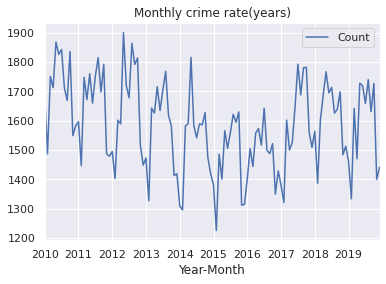

In [ ]:
Battery.plot()
plt.title('Monthly crime rate(years)')

In [ ]:
Battery.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Year-Month', length=120, freq=None)

In [ ]:
#import adfuller from stats model and get rolling mean and std deviation from timeseries data.
#also pass a conditional statement at the end of code to ascertain stationarity.
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
  rolling_mean = timeseries.rolling(12).mean()
  rolling_std = timeseries.rolling(12).std()

  plt.figure(figsize=(20,14))
  plt.plot(timeseries, color = 'blue', label = 'Original')
  plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
  plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean & Rolling Standard Deviation')
  plt.show(block=False)

  print('Stationarity Dickey Fuller Test Results:')
  timeseries = timeseries['Count']
  SDF_test = adfuller(timeseries, autolag= 'AIC')
  dfoutput = pd.Series(SDF_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key,value in SDF_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if (dfoutput['Critical Value (1%)'] > dfoutput['Test Statistic']) or \
    (dfoutput['Critical Value (5%)'] > dfoutput['Test Statistic']) or \
    (dfoutput['Critical Value (10%)'] > dfoutput['Test Statistic']):
    print("Series is 'stationary'")
  else:
    print("Series is Non-stationary")
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


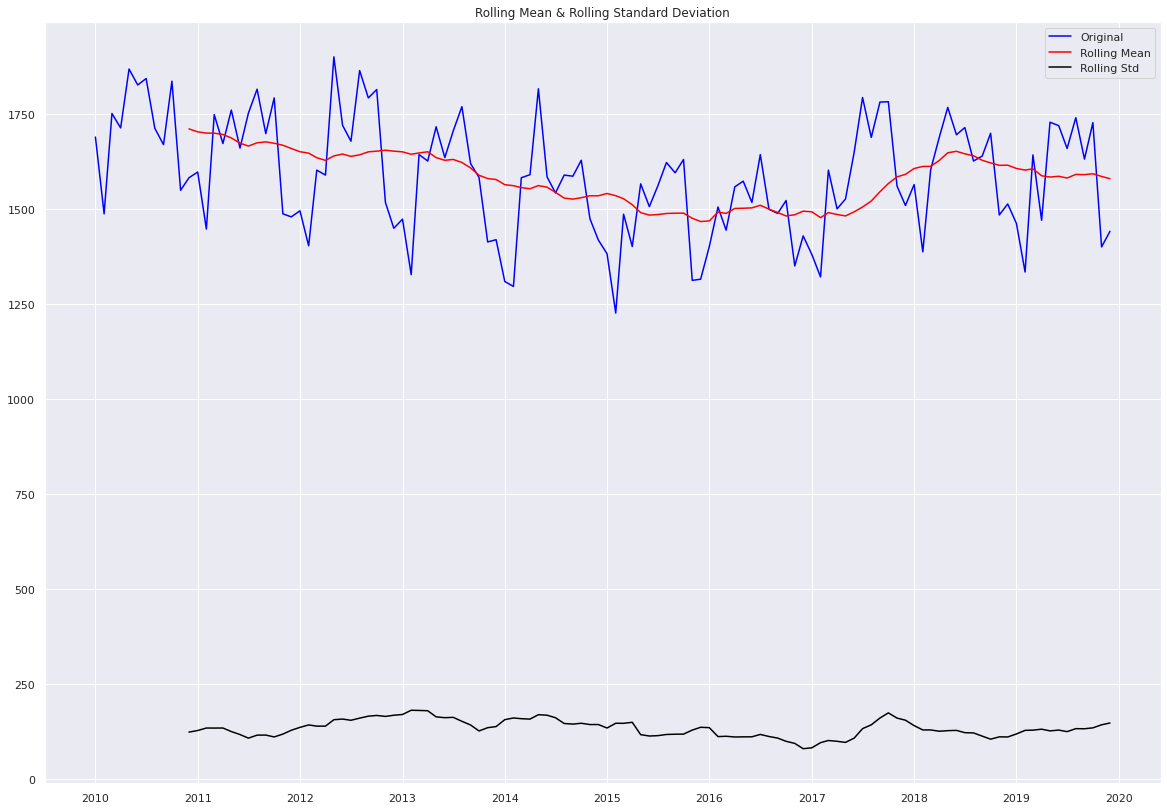

Stationarity Dickey Fuller Test Results:
Test Statistic                  -1.765101
p-value                          0.397920
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
Series is Non-stationary


In [ ]:
#Check for stationarity
test_stationarity(Battery)

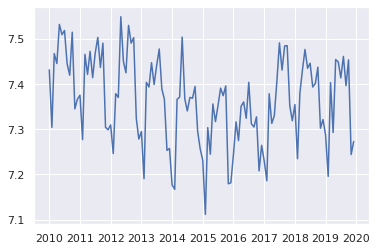

In [ ]:
#taking the log of the dependent variable to lower the rate at which the rolling mean increases.
Battery_log = np.log(Battery)
plt.plot(Battery_log)

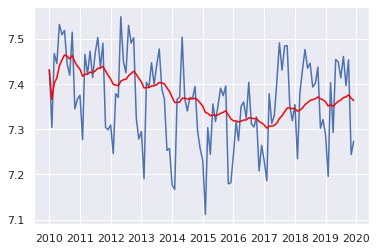

In [ ]:
#applying exponentail decay to make timeseries stationary
exponentialDecayWeightedAverage = Battery_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(Battery_log)
plt.plot(exponentialDecayWeightedAverage, color='red')

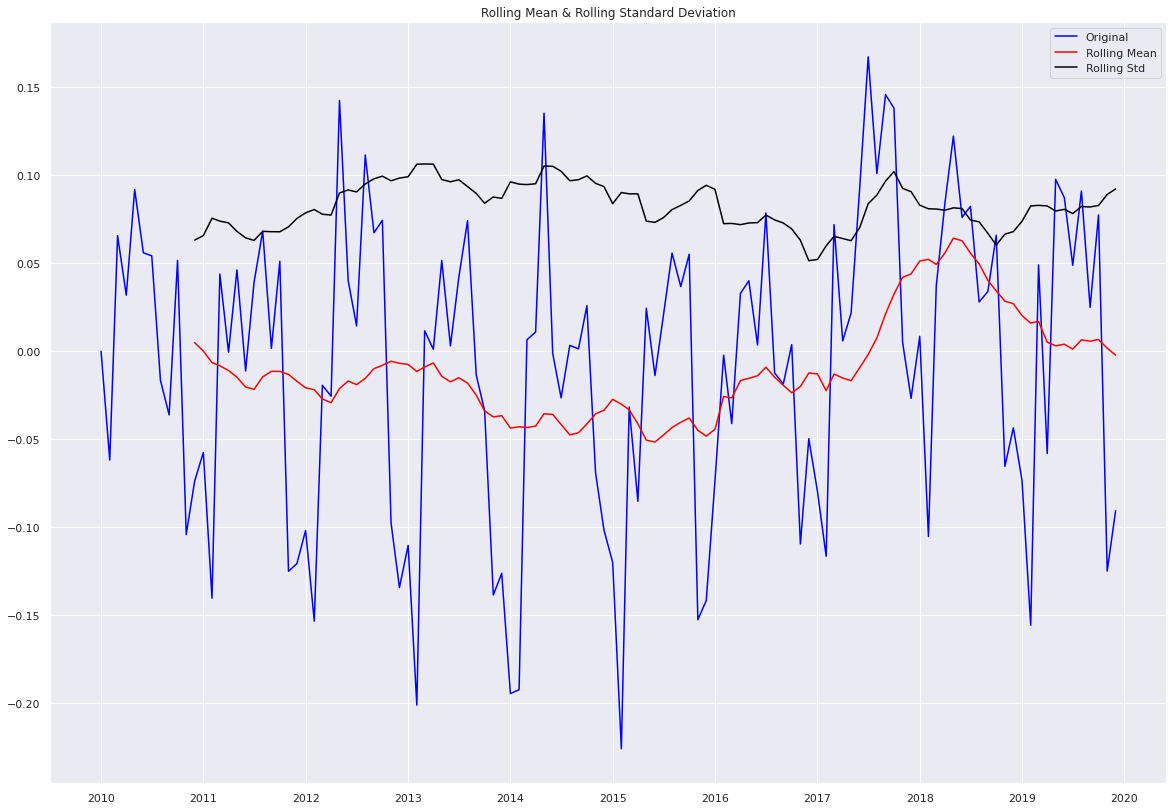

Stationarity Dickey Fuller Test Results:
Test Statistic                  -1.535039
p-value                          0.516113
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
Series is Non-stationary


In [ ]:
#check for stationarity after decay
createindexed_dataMinusExponentialMovingAverage = Battery_log - exponentialDecayWeightedAverage
test_stationarity(createindexed_dataMinusExponentialMovingAverage)

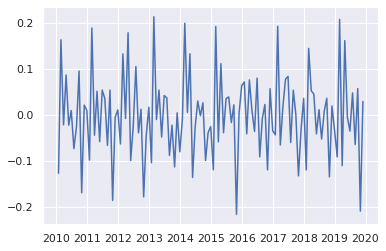

In [ ]:
#applying timeshifting to make timeseries stationary
Battery_logScaleDiffShifting = Battery_log - Battery_log.shift()
plt.plot(Battery_logScaleDiffShifting)

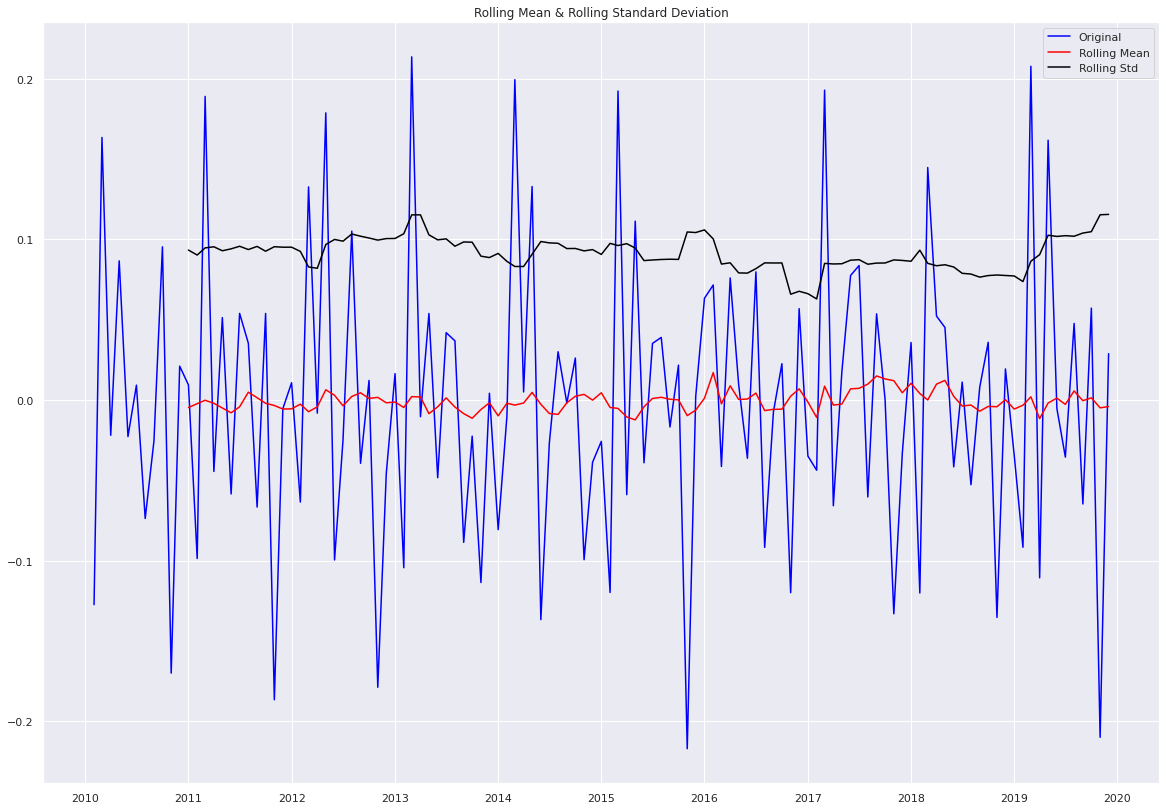

Stationarity Dickey Fuller Test Results:
Test Statistic                  -5.491532
p-value                          0.000002
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
Series is 'stationary'


In [ ]:
#test fpr stationarity on timeshifted series
Battery_logScaleDiffShifting.dropna(inplace=True)
test_stationarity(Battery_logScaleDiffShifting)

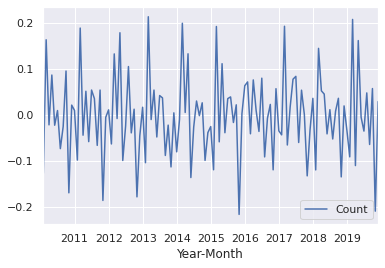

In [ ]:
Battery_logScaleDiffShifting.plot()

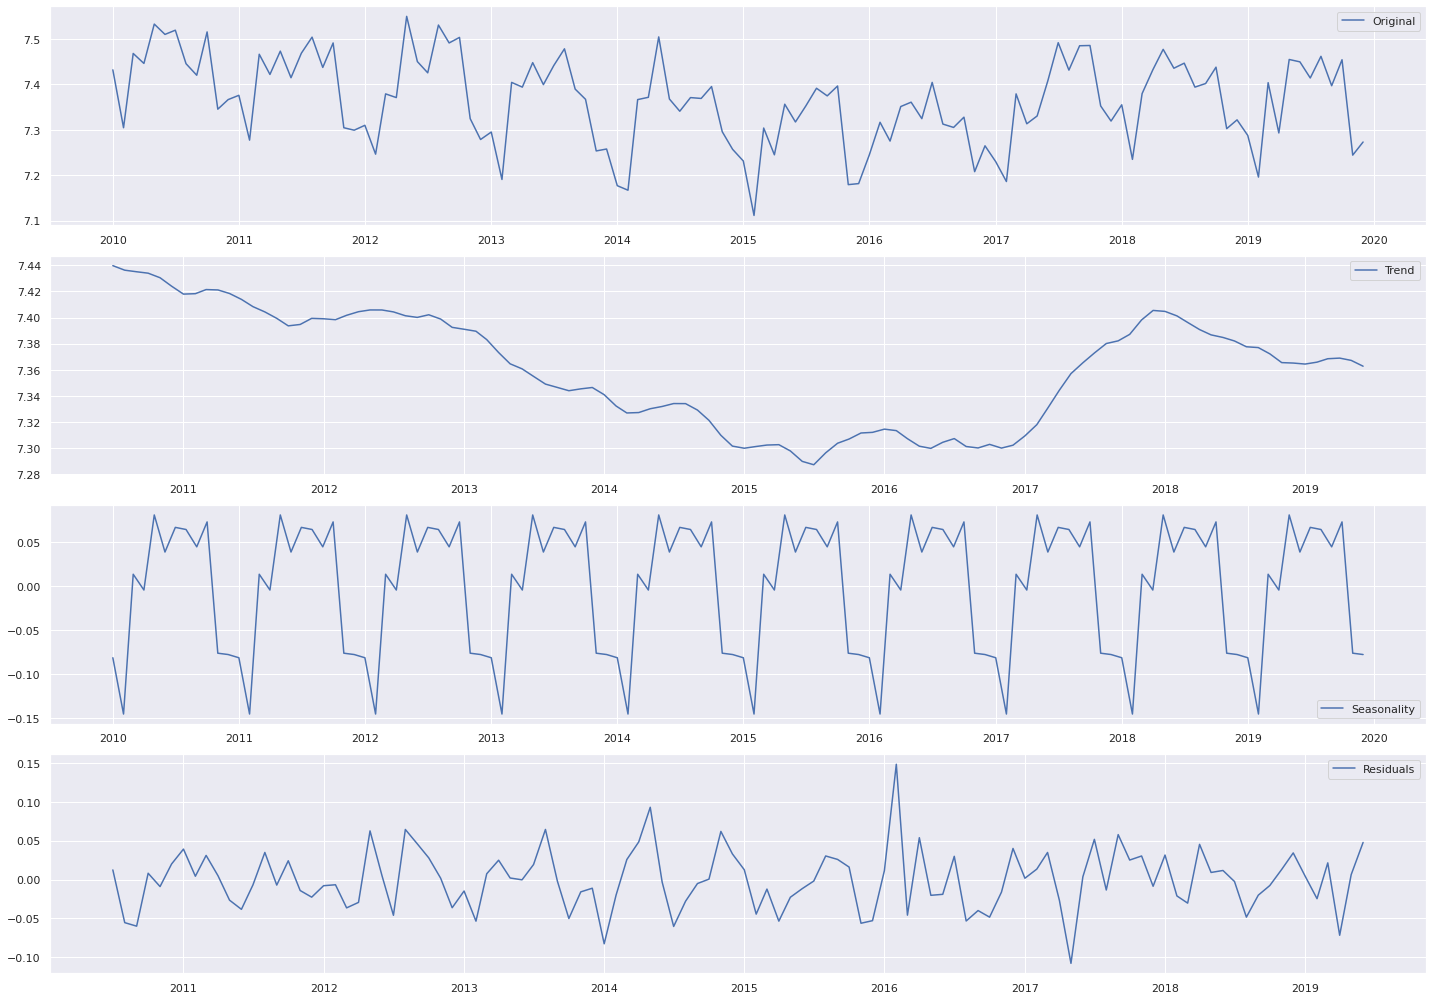

In [ ]:
#apply decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Battery_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,14))
plt.subplot(411)
plt.plot(Battery_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

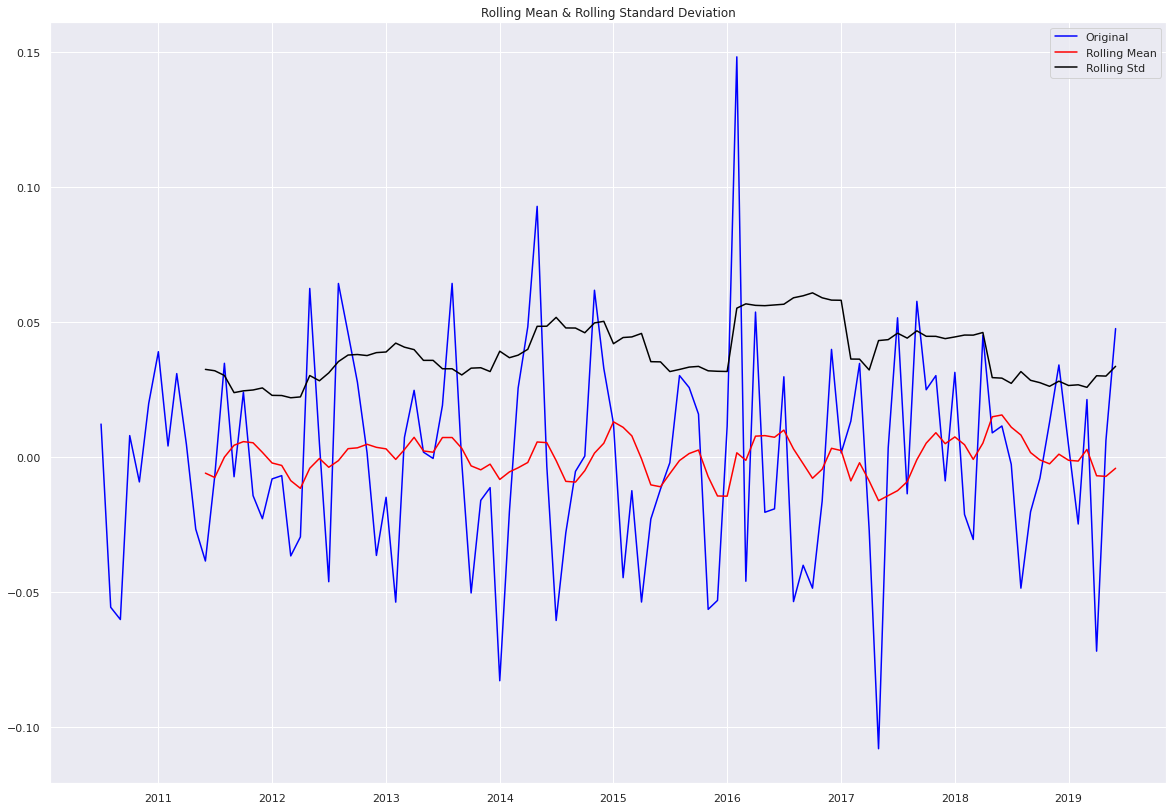

Stationarity Dickey Fuller Test Results:
Test Statistic                -6.802204e+00
p-value                        2.222365e-09
#Lags Used                     5.000000e+00
Number of Observations Used    1.020000e+02
Critical Value (1%)           -3.496149e+00
Critical Value (5%)           -2.890321e+00
Critical Value (10%)          -2.582122e+00
dtype: float64
Series is 'stationary'


In [ ]:
Battery_log_decompose = residual
Battery_log_decompose.dropna(inplace=True)
test_stationarity(Battery_log_decompose)

In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


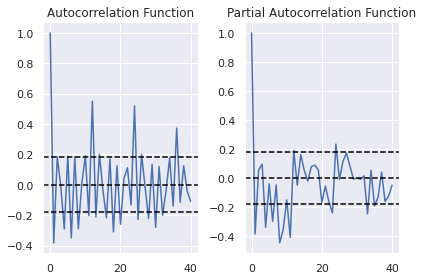

In [ ]:
#ACF and PACF plots

lag_auto_corr = acf(Battery_logScaleDiffShifting, nlags=40)
lag_par_auto_corr = pacf(Battery_logScaleDiffShifting, nlags=40, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(Battery_logScaleDiffShifting)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(Battery_logScaleDiffShifting)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_par_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(Battery_logScaleDiffShifting)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(Battery_logScaleDiffShifting)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

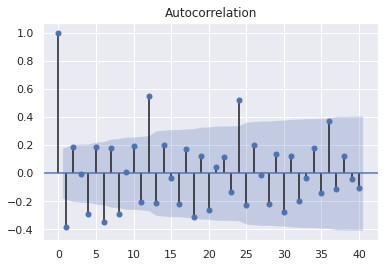

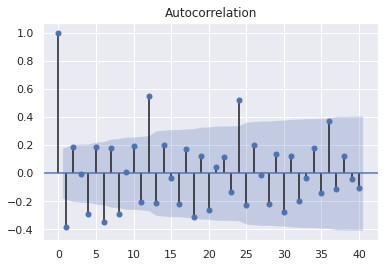

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Battery_logScaleDiffShifting, lags=40)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


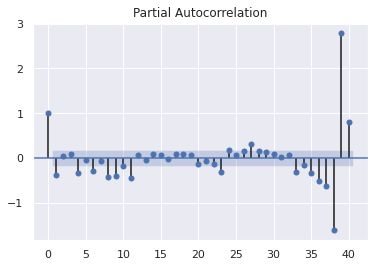

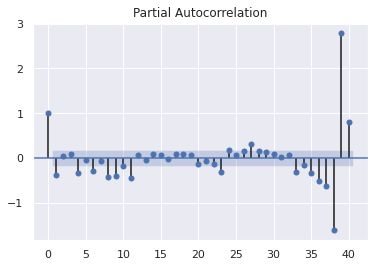

In [ ]:
plot_pacf(Battery_logScaleDiffShifting, lags=40)

In [ ]:
Battery.size

120

In [ ]:
X = Battery.values
X.size

120

In [ ]:
#getting train and test data
train = X[0:108]
test = X[107:]
predictions = []

In [ ]:
#check size
test.size

13

In [ ]:
train.size

108

In [ ]:
import itertools
p=d=q=range(0,5)
pdq= list(itertools.product(p,d,q))

In [ ]:
#get best fit for our pdq values, this can be gotten by checking for the combination with the lowest akaike value.
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
  try:
     model_arima = ARIMA(train,order=param)
     model_arima_fit = model_arima.fit()
     print(param,model_arima_fit.aic)
  except:
     continue


(0, 0, 0) 1390.7341499751142
(0, 0, 1) 1365.5833848217208
(0, 0, 2) 1346.964863537251
(0, 0, 3) 1339.6837140351422
(0, 0, 4) 1341.1898923528324
(0, 1, 0) 1359.5825879420343
(0, 1, 1) 1349.3182765372248
(0, 1, 2) 1349.4739712607807
(0, 1, 3) 1335.9643373210258
(0, 1, 4) 1330.3785163618882
(0, 2, 0) 1452.4171051507185
(0, 2, 1) 1354.5808409168528
(1, 0, 0) 1348.6478029196771
(1, 0, 1) 1348.617173427213
(1, 0, 2) 1341.094531495694
(1, 0, 3) 1340.0544162561396
(1, 0, 4) 1343.8556564854043
(1, 1, 0) 1347.3666150377726
(1, 1, 1) 1349.2474326111815
(1, 1, 2) 1350.4277167403623
(1, 1, 3) 1332.1304025365582
(1, 1, 4) 1330.3751101299645
(1, 2, 0) 1386.648663726313
(1, 2, 1) 1343.0935453764619
(2, 0, 0) 1346.990415657424
(2, 0, 1) 1348.0647311574899
(2, 0, 2) 1342.5958654101562
(2, 0, 3) 1340.7943243198424
(2, 0, 4) 1342.6581938639094
(2, 1, 0) 1349.1867121923215
(2, 1, 1) 1338.3828933307682
(2, 1, 2) 1339.4257564802917
(2, 1, 3) 1343.4256819908437
(2, 1, 4) 1331.5302698635426
(2, 2, 0) 1368.1803

In [ ]:
model_arima = ARIMA(train,order=(3,1,3))
model_arima_fit = model_arima.fit(disp=-1)
print(model_arima_fit.aic)

1312.846867885687


In [ ]:
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  107
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -648.423
Method:                       css-mle   S.D. of innovations            100.505
Date:                Sat, 02 Apr 2022   AIC                           1312.847
Time:                        10:00:46   BIC                           1334.229
Sample:                             1   HQIC                          1321.515
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3835      0.951     -1.455      0.149      -3.247       0.480
ar.L1.D.y     -1.0389      0.073    -14.148      0.000      -1.183      -0.895
ar.L2.D.y      0.2172      0.125      1.736      0.0

In [ ]:
#fit model to make forecast
predictions = model_arima_fit.forecast(steps=13)[0]
predictions

array([1472.64852836, 1500.73730236, 1514.76246087, 1476.72634076,
       1537.22352807, 1474.28340558, 1524.85497259, 1499.07098142,
       1491.5999764 , 1527.29969113, 1469.13233711, 1530.57266925,
       1477.32322906])

In [ ]:
test

array([[1513],
       [1462],
       [1334],
       [1642],
       [1470],
       [1728],
       [1719],
       [1659],
       [1740],
       [1631],
       [1727],
       [1400],
       [1441]])

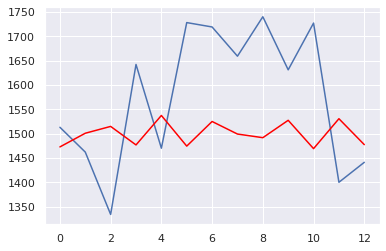

In [ ]:
#plot graph of test data and predictions to see fit.
#not properly fit.
plt.plot(test)
plt.plot(predictions,color = 'red')

In [ ]:
 mapecheck = np.mean(np.abs(predictions - test)/np.abs(test))  # MAPE
 mapecheck

0.08390064157252776

In [ ]:
def mape(test, predictions): 
    test, predictions = np.array(test), np.array(predictions)
    return np.mean(np.abs((test - predictions) / test)) * 100

In [ ]:
#The lower the value for MAPE, the better a model is able to predict values.
#From our calculatons, mape is 8.39%. This means the average difference btw the forcasted values and the actual values is 8.39%.
mape(test, predictions)

8.390064157252777

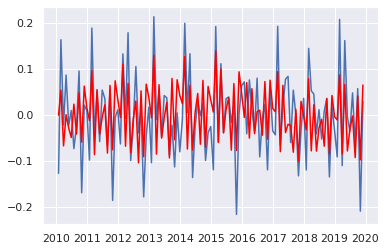

In [ ]:
model_arima = ARIMA(Battery_log,order=(3,1,3))
model_arima_fit = model_arima.fit(disp=-1) 
plt.plot(Battery_logScaleDiffShifting)
plt.plot(model_arima_fit.fittedvalues, color='red')

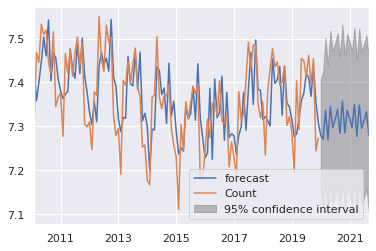

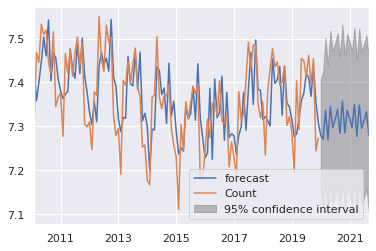

In [ ]:
#forecast lies inside the 95percent confidence interval range.safe to use
mod_prediction = model_arima_fit.plot_predict(1,140)
mod_prediction

In [ ]:
pip install pyramid-arima

     |████████████████████████████████| 515 kB 10.2 MB/s 
  ERROR: Failed building wheel for pyramid-arima
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-kxw00o52/pyramid-arima_c189d341c2fe4335b3cae2f99bbcc4ec/setup.py'"'"'; __file__='"'"'/tmp/pip-install-kxw00o52/pyramid-arima_c189d341c2fe4335b3cae2f99bbcc4ec/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-z2fs5a8r/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pyramid-arima Check the logs 

In [ ]:
from pyramid.arima import auto_arima
model = auto_arima(Battery_log.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


ModuleNotFoundError: ignored

In [ ]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(Battery,trace=True, suppress_warnings=True, stepwise=True)
print(stepwise_model.aic())

In [ ]:
stepwise_model.summary()

In [ ]:
automodel = ARIMA(Battery_log,order=(4,1,5))
automodelfit = automodel.fit()
automodelfit.summary()

In [ ]:
start = len(train)
end = len(train) + len(test)-1
pred = model.predict(n_periods=13)
print(pred)


In [ ]:
#Holt winter

In [ ]:
#import holt winters exponential smoothing lib.
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [ ]:
Batteryhws = pd.DataFrame(Battery_only.groupby('Year-Month')['Year-Month'].count().reset_index(name='Count'))
Batteryhws['Year-Month'] = pd.to_datetime(Batteryhws['Year-Month'], yearfirst=True)
Batteryhws.dtypes
Batteryhws = Batteryhws.set_index(['Year-Month'])
Batteryhws.head()

In [ ]:
#set the dates column to months so stats model doesn't infer on it.
Batteryhws.index.freq = 'MS'

In [ ]:
#plot data to see trend and seasonality. Seasonal variations looks roughly constant therefore we will deploy the addictive model.
Batteryhws.plot()
plt.show()

In [ ]:
#split data between test and training.
df_train = Batteryhws.iloc[:-12]
df_test = Batteryhws.iloc[-12:]

In [ ]:
#check size of train data.
df_train.size

In [ ]:
#also chekc size of test data.
df_test.size

In [ ]:
#model = HWES(df_train,trend='add', seasonal='mul')
#fitted = model.fit()

In [ ]:
# apply holt winter model and fit data on the training data.
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal= 'add')
fitted = model.fit()

In [ ]:
#alpha,beta and gamma being the  weighing coefficients.
print(fitted.summary())

In [ ]:
#forecast for 12months.
Batteryhws_forecast = fitted.forecast(steps=12)
Batteryhws_forecast

In [ ]:
#Converting forecasted counts into dataframe.
forecasteddataframe = pd.DataFrame(data=Batteryhws_forecast,columns=['Count'])
forecasteddataframe = forecasteddataframe.rename_axis('Year-Month')
forecasteddataframe

In [ ]:
#observe test.
df_test

In [ ]:
#The lower the value for MAPE, the better a model is able to predict values.
#From our calculatons, mape is 3.13%. This means the average difference btw the forcasted values and the actual values is 3.13%.
mape(df_test['Count'], forecasteddataframe['Count'])

In [ ]:
#graph capturing actual data and forecast.
fig = plt.figure()
fig.suptitle('Crime count and forecast of battery cases in Los Angeles (2010-2020)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='Crime History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Crime count')
predicted_future, = plt.plot(df_test.index, Batteryhws_forecast, 'g.-', label='Crime Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

In [ ]:
#Facebook prophet

In [ ]:
pip install pystan

In [ ]:
pip install fbprophet

In [ ]:
prophetdf = pd.DataFrame(Battery_only.groupby('Year-Month')['Year-Month'].count().reset_index(name='Count'))
prophetdf['Year-Month'] = pd.to_datetime(prophetdf['Year-Month'], yearfirst=True)

In [ ]:
prophetdf.head()

In [ ]:
prophetdf = prophetdf.rename(columns={"Year-Month": "ds", "Count": "y"}) #renaming columns

In [ ]:
prophetdf.dtypes

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()

In [ ]:
m.fit(prophetdf)

In [ ]:
m

In [ ]:
future = m.make_future_dataframe(periods=24,freq='M' )

In [ ]:
prophetdf.tail()

In [ ]:
future.tail()

In [ ]:
forecastprophet = m.predict(future)

In [ ]:
forecastprophet

In [ ]:
#The lower the value for MAPE, the better a model is able to predict values.
testfb = prophetdf.head()
predictfb = forecastprophet[['ds', 'yhat']].head()
mape(testfb['y'], predictfb['yhat'])
#From our calculatons, mape is 1.47%. This means the average difference btw the forcasted values and the actual values is 1.47%.

In [ ]:
#In the table ds, as we know, is the time series date. yhat is the prediction, yhat_lower and yhat_upper are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels).
#Next up we have trend which shows the long term growth, shrink or stagnancy of the data, trend_lower and trend_upper are the uncertainty levels
forecastprophet[['ds','yhat','yhat_lower','yhat_upper']].tail(26)

In [ ]:
#same graph as fig3,fig1 graph executed with matplotlib.
fig1 = m.plot(forecastprophet)

In [ ]:
# The first graph shows the yearly trend.It starts high and then falls around 2015 then picked up again but it never returned to the hieight which it beginned with.
# The second graph shows monthly trend for a year, also shows the flunctuating nature of the the battery crime occurence.
fig2 = m.plot_components(forecastprophet)

In [ ]:
# This shows the actual data and also predictions made by the facebook prophet. Because we are using plotyly which is interactive we can use place the cursor on the dots, 
#this would display the actual data and if we move cursor around the end of the graph we can see the numbers that where predicted.Predicted values can be seen after the dots on the graph.
#fig1&3 are same but fig3 is more interactive due to the usage of ploty.
from fbprophet.plot import plot_plotly, plot_components_plotly
fig3 = plot_plotly(m, forecastprophet)
fig3

In [ ]:
# Python
#fig2 and 4 are the same graph but one was ploted with matplotlib while the later was ploty. 
#The ploty graphs seems more interactive as we can place the cursor on the graph to see the actual data figures from the tables.
#The graphs shows trends in months and also in days.graph 1 shows in month while 2 in days.
fig4 = plot_components_plotly(m, forecastprophet)
fig4